In [27]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import runpy

In [28]:
# Path to your Excel file
SOURCE_DATA_SF3 = 'SupplementaryFigure3.xlsx'

# Read specific sheet and ranges
mf = pd.read_excel(SOURCE_DATA_SF3, sheet_name='Figure S3b,c,d,f', usecols='A:HY', skiprows=2, nrows=502)
pc = pd.read_excel(SOURCE_DATA_SF3, sheet_name='Figure S3b,c,d,f', usecols='HZ:TP', skiprows=2, nrows=502)

In [29]:
# rate is ssc0, drate is wv0
lm_MF = {
    'rate': mf.iloc[:, 0:116].to_numpy().T,
    'drate': mf.iloc[:, 116:232].to_numpy().T,
    'v0': mf.iloc[0, 232],
    'label': 'MF'
}

lm_PC = {
    'rate': pc.iloc[:, 0:151].to_numpy().T,
    'drate': pc.iloc[:, 151:302].to_numpy().T,
    'v0': pc.iloc[0, 302],
    'label': 'PC'
}

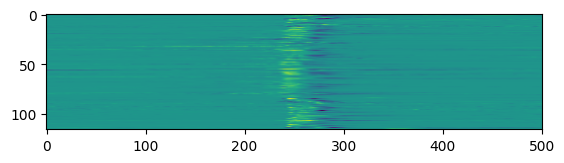

In [30]:
plt.imshow(lm_MF["drate"])

In [31]:
# PCA analysis for mossy fibers

from sklearn.decomposition import PCA

# Loop over the orientations (assuming 8 orientations)
temp_data =lm_MF["drate"].T  # Transpose to match the MATLAB orientation
pca = PCA()
pca.fit(temp_data)  # Perform PCA
v = pca.components_   # coeff
p = pca.transform(temp_data).T  # scores
dd = pca.explained_variance_ratio_   # explained variance

# Get the explained variance ratio and cumulative sum
var_explained = np.cumsum(dd) * 100

# Print the variance explained for the first 5 components
for i in range(5):
    print(f'Dimensions: {i+1}, Variance explained: {var_explained[i]:.2f}%')

# Find the dimension to reduce to based on cumulative variance explained
nmode = np.argmax(var_explained > 87.5) + 1  # Adding 1 since indexing is 1-based in MATLAB
print(f'Dimensions to be reduced: {nmode}')

# Store PCA results for each orientation
PCA_total_MP = {'v': pca.components_, 'p': pca.transform(temp_data), 'dd': pca.explained_variance_ratio_}

Dimensions: 1, Variance explained: 44.37%
Dimensions: 2, Variance explained: 57.61%
Dimensions: 3, Variance explained: 70.33%
Dimensions: 4, Variance explained: 78.05%
Dimensions: 5, Variance explained: 81.70%
Dimensions to be reduced: 8


In [32]:
# PCA analysis for perkinje cells

from sklearn.decomposition import PCA

# Loop over the orientations (assuming 8 orientations)
temp_data =lm_PC["drate"].T  # Transpose to match the MATLAB orientation
pca = PCA()
pca.fit(temp_data)  # Perform PCA
v = pca.components_   # coeff
p = pca.transform(temp_data).T  # scores
dd = pca.explained_variance_ratio_   # explained variance

# Get the explained variance ratio and cumulative sum
var_explained = np.cumsum(dd) * 100

# Print the variance explained for the first 5 components
for i in range(5):
    print(f'Dimensions: {i+1}, Variance explained: {var_explained[i]:.2f}%')

# Find the dimension to reduce to based on cumulative variance explained
nmode = np.argmax(var_explained > 87.5) + 1  # Adding 1 since indexing is 1-based in MATLAB
print(f'Dimensions to be reduced: {nmode}')

# Store PCA results for each orientation
PCA_total_PC = {'v': pca.components_, 'p': pca.transform(temp_data), 'dd': pca.explained_variance_ratio_}

Dimensions: 1, Variance explained: 18.43%
Dimensions: 2, Variance explained: 35.49%
Dimensions: 3, Variance explained: 46.49%
Dimensions: 4, Variance explained: 54.97%
Dimensions: 5, Variance explained: 62.39%
Dimensions to be reduced: 18


In [33]:
#For FN PCA
result = runpy.run_path('datasorting_orientation.py')

val_cat = result['val_cat']
data_cat = result['data_cat']
del result

# preprocessing
data_total = []
for a in range(8): # orientation
    temp = np.array(data_cat).T[a]
    t_temp = []
    for data_num in range(np.shape(data_cat)[0]):
        temp2 = np.mean(temp[0],axis=0)
        t_temp.append(temp2)
        
    data_total.append(t_temp)

# smothing
from filter_matrix import filter_matrix

data_cat_sm = []
for angle in range(8):
    temp_cat = [];
    for n in range(np.shape(data_cat)[0]):
        z = data_cat[n][angle]
        zf = filter_matrix(z,2)
        temp_cat.append(np.mean(zf,axis=0))
        
    data_cat_sm.append(temp_cat)

data_cat_sm = np.array(data_cat_sm)

In [34]:
# PCA analysis

from sklearn.decomposition import PCA

PCA_total = {}

# Loop over the orientations (assuming 8 orientations)
for ori in range(8):
    temp_data = data_cat_sm[ori].T  # Transpose to match the MATLAB orientation
    pca = PCA()
    pca.fit(temp_data)  # Perform PCA
    v = pca.components_   # coeff
    p = pca.transform(temp_data).T  # scores
    dd = pca.explained_variance_ratio_   # explained variance

    # Get the explained variance ratio and cumulative sum
    var_explained = np.cumsum(dd) * 100
    
    # Print the variance explained for the first 5 components
    for i in range(5):
        print(f'Dimensions: {i+1}, Variance explained: {var_explained[i]:.2f}%')

    # Find the dimension to reduce to based on cumulative variance explained
    nmode = np.argmax(var_explained > 87.5) + 1  # Adding 1 since indexing is 1-based in MATLAB
    print(f'Dimensions to be reduced: {nmode}')
    
    # Store PCA results for each orientation
    PCA_total[ori] = {'v': pca.components_, 'p': pca.transform(temp_data), 'dd': pca.explained_variance_ratio_}

del ori

Dimensions: 1, Variance explained: 65.68%
Dimensions: 2, Variance explained: 75.64%
Dimensions: 3, Variance explained: 80.99%
Dimensions: 4, Variance explained: 85.31%
Dimensions: 5, Variance explained: 88.71%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 64.05%
Dimensions: 2, Variance explained: 78.73%
Dimensions: 3, Variance explained: 83.99%
Dimensions: 4, Variance explained: 87.57%
Dimensions: 5, Variance explained: 90.69%
Dimensions to be reduced: 4
Dimensions: 1, Variance explained: 57.01%
Dimensions: 2, Variance explained: 76.14%
Dimensions: 3, Variance explained: 82.16%
Dimensions: 4, Variance explained: 86.65%
Dimensions: 5, Variance explained: 89.17%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 58.25%
Dimensions: 2, Variance explained: 76.74%
Dimensions: 3, Variance explained: 82.72%
Dimensions: 4, Variance explained: 87.21%
Dimensions: 5, Variance explained: 89.41%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 62.37%
Dimens

In [35]:
pca_data = []
for pc in range(4):
    for a in range(8):
        temp = PCA_total[a]['p'].T
        temp = temp[pc]
        pca_data.append(temp)
pca_data = np.array(pca_data)

In [36]:
pFN = pca_data[:,50:550]

pMP = PCA_total_MP['p']
pMP = pMP[:500, :5]

pPC = PCA_total_PC['p']
pPC = pPC[:500, :5]

pMPC = np.hstack((pMP, pPC))

In [37]:
betas = []
r_2 = []
for a in range(len(pFN)):
    beta, resid = np.linalg.lstsq(pMPC, pFN[a], rcond=None)[:2]
    resid = np.linalg.norm(pMPC @ beta - pFN[a])**2
    r_s = 1 - resid / (pFN[a].size * pFN[a].var())
    betas.append(beta)
    r_2.append(r_s)

betas = np.array(betas)
r_2 = np.array(r_2)

In [38]:
df(betas[:16])

,0,1,2,3,4,5,6,7,8,9
0,216.975959,308.247445,-401.838766,31.944386,18.342323,339.924152,-337.240883,-458.911693,145.768955,444.163750
1,211.400957,311.997802,-402.849896,72.974011,44.609666,293.227271,-401.386506,-381.791044,31.185907,449.609163
2,209.774556,288.742722,-359.572834,77.535358,25.557978,353.748309,-447.446312,-326.525195,108.686489,340.551202
3,147.187896,288.383144,-389.014000,-27.234158,-33.741461,293.620166,-304.554736,-327.823075,55.018744,367.798904
4,59.330423,302.210282,-406.716432,-245.679343,-190.995607,226.865575,-73.629683,-377.197058,40.625020,346.779521
5,27.926605,338.234342,-435.714698,-287.281351,-160.852815,295.401369,-70.387777,-391.813657,81.286206,370.808159
6,98.832646,348.153181,-438.599243,-142.643464,-77.321717,311.324296,-168.823319,-375.452957,104.203104,408.771950
7,157.668893,328.838273,-421.035771,-76.572763,-57.343520,344.330144,-266.660062,-432.042503,168.615223,415.020307
8,-54.694145,9.306967,-20.373240,-141.531118,-85.412250,129.566583,-14.271931,-46.738225,68.154409,-12.525324
9,-29.821127,10.929274,-19.998445,-65.601984,-21.751942,312.916470,-159.610903,-39.102223,147.525840,65.698441


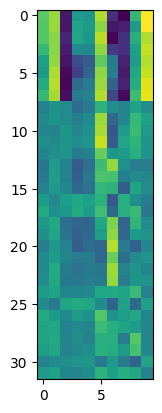

In [39]:
plt.imshow(betas)
plt.savefig("beta.jpg")

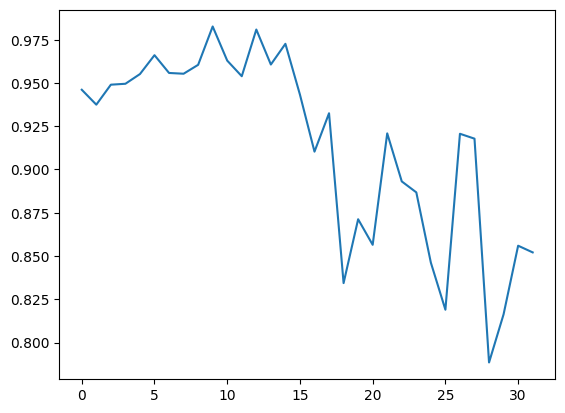

In [40]:
plt.plot(r_2)

plt.savefig("r2.jpg")

In [41]:
r_2

array([0.94607917, 0.93745902, 0.94900675, 0.94953394, 0.95514482,
       0.96605356, 0.95577917, 0.95533674, 0.96047535, 0.982642  ,
       0.96291462, 0.95389197, 0.98087663, 0.96065254, 0.97262331,
       0.94323903, 0.91031214, 0.93250096, 0.83434746, 0.8712449 ,
       0.85646944, 0.92086834, 0.89310843, 0.88676855, 0.84616499,
       0.81894939, 0.92064277, 0.91781174, 0.78847175, 0.81631422,
       0.8559519 , 0.85208918])

In [23]:
pFN.shape

(32, 500)

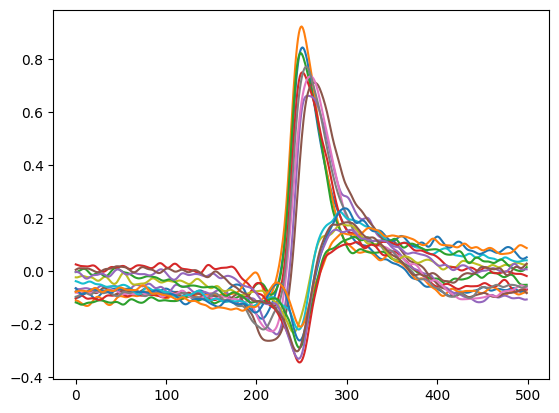

In [24]:
for a in range(16):
    plt.plot(pFN[a])